Test on https://www.kaggle.com/datasets/wanghaohan/confused-eeg/code


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('kaggle/confused-eeg/EEG_data.csv')
df


,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


In [3]:
def get_sequence(subjectID, videoID, name, df):
    return np.array(df[(df['SubjectID'] == subjectID) & (df['VideoID'] == videoID)][name])

In [4]:
import numpy as np

sequences_delta = []
sequences_theta = []
sequences_alpha1 = []
sequences_alpha2 = []
sequences_beta1 = []
sequences_beta2 = []
sequences_gamma1 = []
sequences_gamma2 = []
y = []
seq_length = 50
for i in range(10):
    for j in range(10):
        sequences_delta.append(get_sequence(i, j, 'Delta', df)[:50])
        sequences_delta.append(get_sequence(i, j, 'Delta', df)[50:100])
        sequences_theta.append(get_sequence(i, j, 'Theta', df)[:50])
        sequences_theta.append(get_sequence(i, j, 'Theta', df)[50:100])
        sequences_alpha1.append(get_sequence(i, j, 'Alpha1', df)[:50])
        sequences_alpha1.append(get_sequence(i, j, 'Alpha1', df)[50:100])
        sequences_alpha2.append(get_sequence(i, j, 'Alpha2', df)[:50])
        sequences_alpha2.append(get_sequence(i, j, 'Alpha2', df)[50:100])
        sequences_beta1.append(get_sequence(i, j, 'Beta1', df)[:50])
        sequences_beta1.append(get_sequence(i, j, 'Beta1', df)[50:100])
        sequences_beta2.append(get_sequence(i, j, 'Beta2', df)[:50])
        sequences_beta2.append(get_sequence(i, j, 'Beta2', df)[50:100])
        sequences_gamma1.append(get_sequence(i, j, 'Gamma1', df)[:50])
        sequences_gamma1.append(get_sequence(i, j, 'Gamma1', df)[50:100])
        sequences_gamma2.append(get_sequence(i, j, 'Gamma2', df)[:50])
        sequences_gamma2.append(get_sequence(i, j, 'Gamma2', df)[50:100])
        y.append(np.array(df[(df['SubjectID'] == i) & (df['VideoID'] == j)]['user-definedlabeln'])[0])
        y.append(np.array(df[(df['SubjectID'] == i) & (df['VideoID'] == j)]['user-definedlabeln'])[0])


In [5]:
import numpy as np

sequences_delta = np.array(sequences_delta)
sequences_theta = np.array(sequences_theta)
sequences_alpha1 = np.array(sequences_alpha1)
sequences_alpha2 = np.array(sequences_alpha2)
sequences_beta1 = np.array(sequences_beta1)
sequences_beta2 = np.array(sequences_beta2)
sequences_gamma1 = np.array(sequences_gamma1)
sequences_gamma2 = np.array(sequences_gamma2)
y = np.array(y)

In [6]:
sequences_delta

array([[ 301963.,   73787.,  758353., ...,  341908.,    8588.,  256616.],
       [  22853.,    8661.,   91553., ...,    7071.,  189432.,   12813.],
       [ 587813.,  264810., 1817666., ..., 2311485.,  635374.,  557205.],
       ...,
       [ 610287.,  922704., 1772654., ...,  413902., 1320378.,   70489.],
       [ 715551., 1447203.,  326369., ..., 2513121.,  350799.,  160566.],
       [1035769., 2254114.,  541766., ...,  963015.,  118267.,  153327.]])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = np.array([
    scaler.fit_transform(sequences_delta),
    scaler.fit_transform(sequences_theta),
    scaler.fit_transform(sequences_alpha1),
    scaler.fit_transform(sequences_alpha2),
    scaler.fit_transform(sequences_beta1),
    scaler.fit_transform(sequences_beta2),
    scaler.fit_transform(sequences_gamma1),
    scaler.fit_transform(sequences_gamma2),
])

In [8]:
data[0]

array([[-0.61121355, -0.98145316, -0.0239494 , ..., -0.37986602,
        -0.901142  , -0.48532111],
       [-1.1251476 , -1.08354603, -0.93663816, ..., -0.93362   ,
        -0.60713119, -0.90568964],
       [-0.08486893, -0.68200154,  1.42599523, ...,  2.87742363,
         0.1178681 ,  0.03295863],
       ...,
       [-0.04348685,  0.34932673,  1.36438463, ..., -0.26080223,
         1.2315273 , -0.80624388],
       [ 0.15033908,  1.17154224, -0.61523155, ...,  3.21088957,
        -0.3447855 , -0.65093186],
       [ 0.73996658,  2.43647265, -0.32040489, ...,  0.64732175,
        -0.72282913, -0.66341345]])

In [9]:
y.shape

(200,)

In [10]:
df_dem = pd.read_csv('kaggle/confused-eeg/demographic_info.csv')
df_dem.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


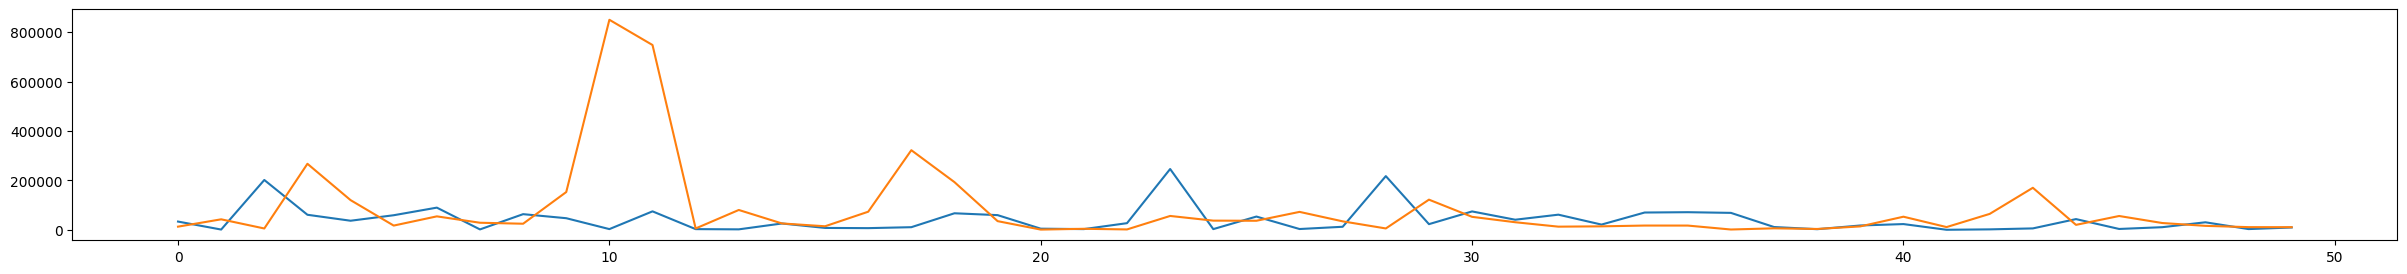

In [11]:
plt.figure(figsize=(30, 3))
plt.plot(sequences_alpha1[0])
plt.plot(sequences_alpha1[10])

In [12]:
from keras.api.layers import Input, Dense, Concatenate, LSTM
from keras.api.models import Model

2024-12-14 13:37:30.717684: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-14 13:37:30.728802: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734179850.741737  136886 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734179850.745686  136886 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 13:37:30.758831: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [13]:
# Define input layers
input_delta = Input(shape=(seq_length, 1), name='eeg_delta')
input_theta = Input(shape=(seq_length, 1), name='eeg_theta')
input_alpha_1 = Input(shape=(seq_length, 1), name='eeg_alpha_1')
input_alpha_2 = Input(shape=(seq_length, 1), name='eeg_alpha_2')
input_beta_1 = Input(shape=(seq_length, 1), name='eeg_beta1')
input_beta_2 = Input(shape=(seq_length, 1), name='eeg_beta2')
input_gamma_1 = Input(shape=(seq_length, 1), name='eeg_gamma1')
input_gamma_2 = Input(shape=(seq_length, 1), name='eeg_gamma2')

lstm0 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1))(input_delta)
lstm1 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1))(input_theta)
lstm2 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1))(input_alpha_1)
lstm3 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1))(input_alpha_2)
lstm4 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1))(input_beta_1)
lstm5 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1))(input_beta_2)
lstm6 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1))(input_gamma_1)
lstm7 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1))(input_gamma_2)

lstm0_2 = LSTM(units=32, input_shape=(seq_length, 1))(lstm0)
lstm1_2 = LSTM(units=32, input_shape=(seq_length, 1))(lstm1)
lstm2_2 = LSTM(units=32, input_shape=(seq_length, 1))(lstm2)
lstm3_2 = LSTM(units=32, input_shape=(seq_length, 1))(lstm3)
lstm4_2 = LSTM(units=32, input_shape=(seq_length, 1))(lstm4)
lstm5_2 = LSTM(units=32, input_shape=(seq_length, 1))(lstm5)
lstm6_2 = LSTM(units=32, input_shape=(seq_length, 1))(lstm6)
lstm7_2 = LSTM(units=32, input_shape=(seq_length, 1))(lstm7)

combined = Concatenate()([
    lstm0_2,
    lstm1_2,
    lstm2_2,
    lstm3_2,
    lstm4_2,
    lstm5_2,
    lstm6_2,
    lstm7_2,
])

# Define the final output layer
dense = Dense(32, activation="relu")(combined)
dense2 = Dense(16, activation="relu")(dense)
dense3 = Dense(8, activation="relu")(dense2)
dense4 = Dense(4, activation="relu")(dense3)
dense5 = Dense(2, activation="relu")(dense4)
output = Dense(1, activation='sigmoid')(dense5)  # binary classification output

# Create the model
model = Model(inputs=[
    input_delta,
    input_theta,
    input_alpha_1,
    input_alpha_2,
    input_beta_1,
    input_beta_2,
    input_gamma_1,
    input_gamma_2,
], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

I0000 00:00:1734179851.915236  136886 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 12198 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
/home/kuba/PycharmProjects/VR_Sickness_prediction/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
lstm0_2 = LSTM(units=32, input_shape=(seq_length, 1))(input_delta)
lstm1_2 = LSTM(units=32, input_shape=(seq_length, 1))(input_theta)
lstm2_2 = LSTM(units=32, input_shape=(seq_length, 1))(input_alpha_1)
lstm3_2 = LSTM(units=32, input_shape=(seq_length, 1))(input_alpha_2)
lstm4_2 = LSTM(units=32, input_shape=(seq_length, 1))(input_beta_1)
lstm5_2 = LSTM(units=32, input_shape=(seq_length, 1))(input_beta_2)
lstm6_2 = LSTM(units=32, input_shape=(seq_length, 1))(input_gamma_1)
lstm7_2 = LSTM(units=32, input_shape=(seq_length, 1))(input_gamma_2)

combined = Concatenate()([
    lstm0_2,
    lstm1_2,
    lstm2_2,
    lstm3_2,
    lstm4_2,
    lstm5_2,
    lstm6_2,
    lstm7_2,
])

dense = Dense(32, activation="relu")(combined)
dense2 = Dense(16, activation="relu")(dense)
dense3 = Dense(8, activation="relu")(dense2)
dense4 = Dense(4, activation="relu")(dense3)
dense5 = Dense(2, activation="relu")(dense4)
output = Dense(1, activation='sigmoid')(dense5)
simple_model = Model(inputs=[
    input_delta,
    input_theta,
    input_alpha_1,
    input_alpha_2,
    input_beta_1,
    input_beta_2,
    input_gamma_1,
    input_gamma_2,
],
    outputs=output
)

# Compile the model
simple_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/home/kuba/PycharmProjects/VR_Sickness_prediction/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
permutation = np.random.permutation(data.shape[1])
data = data[:, permutation]
y = y[permutation]

In [27]:
data.shape

(8, 200, 50)

In [28]:
y.shape

(200,)

In [29]:
train_data = data[:, 0:160]
test_data = data[:, 160:200]
train_y = y[0:160]
test_y = y[160:200]

In [30]:
print(train_data.shape)
print(test_data.shape)
print(train_y.shape)
print(test_y.shape)

(8, 160, 50)
(8, 40, 50)
(160,)
(40,)


In [31]:
train_y

array([0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1.])

In [32]:
test_y

array([0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1.])

In [35]:
history = model.fit(x=[
    train_data[0],
    train_data[1],
    train_data[2],
    train_data[3],
    train_data[4],
    train_data[5],
    train_data[6],
    train_data[7],
],
    y=train_y,
    epochs=100,
    batch_size=10,
    validation_data=([
                         test_data[0],
                         test_data[1],
                         test_data[2],
                         test_data[3],
                         test_data[4],
                         test_data[5],
                         test_data[6],
                         test_data[7],
                     ], test_y)
)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9000 - loss: 0.3880 - val_accuracy: 0.7250 - val_loss: 0.7847
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9214 - loss: 0.2330 - val_accuracy: 0.7250 - val_loss: 0.7210
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9534 - loss: 0.1758 - val_accuracy: 0.7500 - val_loss: 0.5101
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9030 - loss: 0.2606 - val_accuracy: 0.7000 - val_loss: 0.6966
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9472 - loss: 0.1688 - val_accuracy: 0.7250 - val_loss: 0.6628
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9689 - loss: 0.1128 - val_accuracy: 0.7500 - val_loss: 0.6372
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9692 - loss: 0.1132 - val_accuracy: 0.7750 - val_loss: 0.5805
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9462 - loss: 0.1557 - val_accuracy: 0.

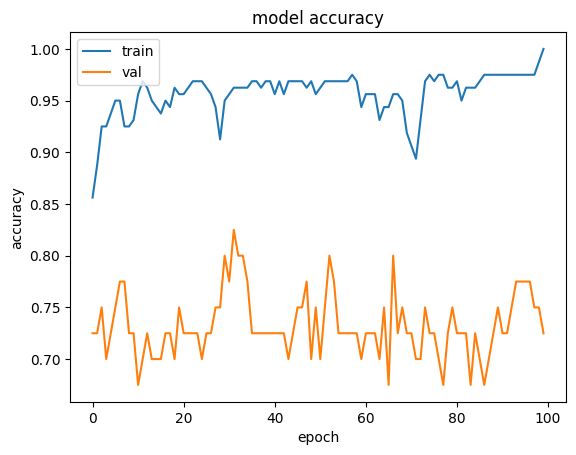

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [37]:
history = simple_model.fit(x=[
    train_data[0],
    train_data[1],
    train_data[2],
    train_data[3],
    train_data[4],
    train_data[5],
    train_data[6],
    train_data[7],
],
    y=train_y,
    epochs=100,
    batch_size=10,
    validation_data=([
                         test_data[0],
                         test_data[1],
                         test_data[2],
                         test_data[3],
                         test_data[4],
                         test_data[5],
                         test_data[6],
                         test_data[7],
                     ], test_y)
)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9218 - loss: 0.2686 - val_accuracy: 0.5500 - val_loss: 1.1395
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9422 - loss: 0.2749 - val_accuracy: 0.6750 - val_loss: 1.3569
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9197 - loss: 0.2669 - val_accuracy: 0.6500 - val_loss: 1.3420
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9113 - loss: 0.2792 - val_accuracy: 0.6500 - val_loss: 1.3510
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9154 - loss: 0.2675 - val_accuracy: 0.5750 - val_loss: 1.2511
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9368 - loss: 0.2229 - val_accuracy: 0.5500 - val_loss: 1.2775
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9375 - loss: 0.2115 - val_accuracy: 0.6500 - val_loss: 1.3018
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9500 - loss: 0.1818 - val_accuracy: 0.

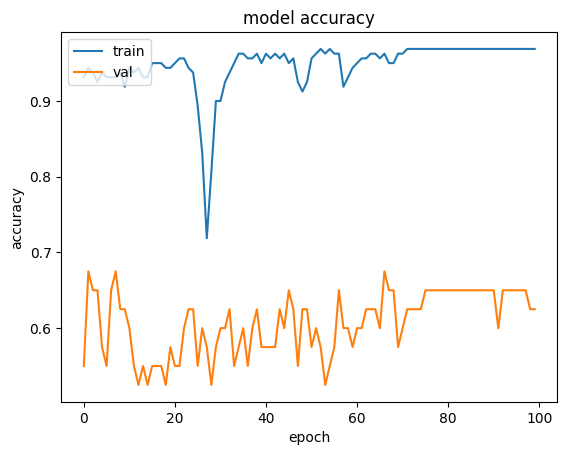

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()